In [1]:
import gym
import numpy as np

In [2]:
maxi = [3, 3, 5.1, 5.1, 3.3, 5.1, 1, 1] 
zmini = [-1.7, -1.7, -5.1, -5.1, -3.3, -5.1, 0, 0]
my_bin = [5, 5, 5, 5, 5, 5, 2, 2]

In [3]:
maxi = [1.5, 1.5, 5, 5, 3.14, 5, 1, 1] 
mini = [-1.5, -1.5, -5, -5, -3.14, -5, 0, 0]
my_bin = [8, 8, 5, 5, 5, 5, 2, 2]
#my_bin = [5, 5, 5, 5, 5, 5, 2, 2]

In [4]:
env = gym.make("LunarLander-v2")
observation = env.reset(seed=20, return_info=False)

C:\Anaconda\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Anaconda\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
test = np.array([-1.6,  1.3999956 , -0.3203935 , -0.48554128,  0.00367194,
        0.072574  ,  0.        ,  0.        ])

In [6]:
def get_discrete_state(obs):
    
    obs = [min(elem_maxi, elem_obs) for elem_obs, elem_maxi in zip(obs, maxi)]
    
    obs = [max(elem_mini, elem_obs) for elem_obs, elem_mini in zip(obs, mini)]
    
    res = np.int64(np.floor(0.99*np.array(my_bin)*(obs-np.array(mini))/(np.array(maxi)-np.array(mini))))
    return res   

In [7]:
res =get_discrete_state(test)

In [8]:
q_table = np.random.uniform(low=0, high=1, size=(my_bin + [env.action_space.n]))
q_table.shape

(8, 8, 5, 5, 5, 5, 2, 2, 4)

In [11]:
LEARNING_RATE = 0.15

DISCOUNT = 0.995
EPISODES = 5000
total = 0
total_reward = 0
prior_reward = 0


epsilon = 1 # Taux d'apprentissage

epsilon_decay_value = 0.99995

In [ ]:
import time
import math
rewards = []
cpt_step = 0
for episode in range(EPISODES + 1): #go through the episodes
    print(cpt_step)
    cpt_step = 0
    print(episode)
    t0 = time.time() #set the initial time
    discrete_state = get_discrete_state(env.reset()) # get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 # reward starts as 0 for each episode

    if episode % 500 == 0: 
        print("Episode: " + str(episode))

    while not done: 
        

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) # do a random action

        new_state, reward, done, _ = env.step(action) # step action to get new states, reward, and the "done" status.
        cpt_step += 1
        episode_reward += reward # add the reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % 500 == 0: # render
            env.render()

        if not done: # update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[np.array(list(discrete_state) + [action])]
            
            #q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[np.array(list(discrete_state) + [action])] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.01: # epsilon modification
       # if episode_reward > prior_reward and episode > 10000: 
        if episode > 500:
            epsilon *= 1 - 0.0001;
            #epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() # episode has finished
    episode_total = t1 - t0 # episode total time
    total = total + episode_total

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward
    rewards.append(episode_reward)
    if episode % 3 == 0: # every 1000 episodes print the average time and the average reward
        mean = total / 3
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 3
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

0
0
Episode: 0
Time Average: 0.8599244753519694
Mean Reward: -101.77894379112438
115
1
104
2
78
3
Time Average: 1.1397265593210857
Mean Reward: -172.92813867048835
99
4
101
5
65
6
Time Average: 1.031408389409383
Mean Reward: -177.41621717589928
72
7
70
8
105
9
Time Average: 1.0781628290812175
Mean Reward: -148.3544444215976
69
10
127
11
100
12
Time Average: 1.3847449620564778
Mean Reward: -270.20633888432957
108
13
125
14
88
15
Time Average: 1.1652850310007732
Mean Reward: -123.11492155553476
96
16
78
17
85
18
Time Average: 0.926844040552775
Mean Reward: -217.78570107202245
84
19
76
20
121
21
Time Average: 1.1492993036905925
Mean Reward: -145.4903226160587
106
22
81
23
97
24
Time Average: 1.3996495405832927
Mean Reward: -225.31802505787383
168
25
92
26
74
27
Time Average: 1.001532793045044
Mean Reward: -304.0327756144472
91
28
78
29
112
30
Time Average: 1.0755681196848552
Mean Reward: -172.7346446440762
90
31
94
32
88
33
Time Average: 1.062261740366618
Mean Reward: -300.47372768918245


124
284
100
285
Time Average: 1.2179586092631023
Mean Reward: -284.8400815903818
100
286
125
287
144
288
Time Average: 1.3029134273529053
Mean Reward: -95.40664811438245
90
289
110
290
103
291
Time Average: 1.174769401550293
Mean Reward: -292.13865295429196
96
292
121
293
84
294
Time Average: 1.307049036026001
Mean Reward: -208.51724945075253
158
295
65
296
111
297
Time Average: 0.9450236161549886
Mean Reward: -134.3304144975446
89
298
172
299
112
300
Time Average: 1.2681857744852703
Mean Reward: -150.987531158543
67
301
109
302
87
303
Time Average: 1.0079857508341472
Mean Reward: -218.09308964377695
83
304
90
305
85
306
Time Average: 0.8707923889160156
Mean Reward: -233.53074113924595
58
307
133
308
91
309
Time Average: 1.1410499413808186
Mean Reward: -358.34237841430513
93
310
120
311
103
312
Time Average: 1.1076054573059082
Mean Reward: -268.77146638680466
73
313
101
314
69
315
Time Average: 1.0573259989420574
Mean Reward: -182.0430089132476
101
316
68
317
71
318
Time Average: 1.023

80
566
98
567
Time Average: 0.8840679327646891
Mean Reward: -153.94877833384598
69
568
101
569
102
570
Time Average: 0.9650957584381104
Mean Reward: -169.16867769424206
67
571
76
572
75
573
Time Average: 0.9040993849436442
Mean Reward: -266.7778177941742
101
574
75
575
74
576
Time Average: 1.126851240793864
Mean Reward: -193.974970007164
151
577
87
578
110
579
Time Average: 0.9485640525817871
Mean Reward: -261.90272032573546
67
580
103
581
89
582
Time Average: 1.0604060490926106
Mean Reward: -127.41941407611485
104
583
89
584
103
585
Time Average: 1.0399449666341145
Mean Reward: -230.93818987721352
100
586
62
587
74
588
Time Average: 0.8563393751780192
Mean Reward: -114.76828969184363
105
589
125
590
105
591
Time Average: 1.1581206321716309
Mean Reward: -227.07917214399492
91
592
93
593
62
594
Time Average: 0.9381676514943441
Mean Reward: -126.0996336720821
106
595
103
596
94
597
Time Average: 1.0179745356241863
Mean Reward: -176.16959401935046
88
598
131
599
148
600
Time Average: 1.27

129
848
86
849
Time Average: 1.1559528509775798
Mean Reward: -189.1093193001259
97
850
74
851
67
852
Time Average: 0.935330867767334
Mean Reward: -186.63237570111144
117
853
84
854
77
855
Time Average: 0.9044047991434733
Mean Reward: -138.88796759591693
92
856
102
857
99
858
Time Average: 1.1964211463928223
Mean Reward: -255.70211001475852
132
859
88
860
90
861
Time Average: 0.8756109078725179
Mean Reward: -122.72015267600564
66
862
74
863
75
864
Time Average: 1.1208667755126953
Mean Reward: -108.46434316737832
164
865
79
866
123
867
Time Average: 1.1156016985575359
Mean Reward: -172.2526484773144
99
868
124
869
91
870
Time Average: 1.0941498279571533
Mean Reward: -186.6518787153958
89
871
66
872
93
873
Time Average: 0.798965851465861
Mean Reward: -108.45851522940342
65
874
106
875
107
876
Time Average: 1.013634204864502
Mean Reward: -209.75697571413968
71
877
98
878
96
879
Time Average: 0.9781041145324707
Mean Reward: -247.76748985482982
78
880
94
881
75
882
Time Average: 0.9398824373

103
1125
Time Average: 1.1012453238169353
Mean Reward: -330.307608057241
68
1126
103
1127
108
1128
Time Average: 1.1874174276987712
Mean Reward: -311.27349443776177
71
1129
80
1130
97
1131
Time Average: 1.132932186126709
Mean Reward: -138.1775631154246
93
1132
76
1133
106
1134
Time Average: 1.2155427138010662
Mean Reward: -154.07269551055165
119
1135
74
1136
69
1137
Time Average: 1.0511544545491536
Mean Reward: -181.78905471031905
112
1138
115
1139
63
1140
Time Average: 1.2507099310557048
Mean Reward: -181.85910900301678
106
1141
170
1142
130
1143
Time Average: 1.9649508794148762
Mean Reward: -86.09015144829705
67
1144
90
1145
102
1146
Time Average: 1.3933498859405518
Mean Reward: -181.85712489631985
71
1147
92
1148
111
1149
Time Average: 1.6863133907318115
Mean Reward: -208.22083602418707
73
1150
85
1151
72
1152
Time Average: 1.5278955300649006
Mean Reward: -199.12567026895633
81
1153
61
1154
162
1155
Time Average: 1.5254247983296711
Mean Reward: -231.76309356580546
122
1156
91
1157
1

112
1397
112
1398
Time Average: 1.1667145888010662
Mean Reward: -104.13656375249529
103
1399
109
1400
78
1401
Time Average: 0.999958356221517
Mean Reward: -147.542806130318
100
1402
97
1403
94
1404
Time Average: 0.9859334627787272
Mean Reward: -82.14887481475763
93
1405
98
1406
100
1407
Time Average: 1.1289445559183757
Mean Reward: -352.91445167679564
125
1408
99
1409
81
1410
Time Average: 0.9604635238647461
Mean Reward: -152.20988784786732
91
1411
71
1412
118
1413
Time Average: 1.0489561557769775
Mean Reward: -128.25848455226892
99
1414
78
1415
96
1416
Time Average: 0.9612570603688558
Mean Reward: -157.8450266282643
101
1417
114
1418
97
1419
Time Average: 1.2136780420939128
Mean Reward: -96.67750232274709
86
1420
73
1421
105
1422
Time Average: 1.0486102104187012
Mean Reward: -223.7102652031388
118
1423
99
1424
88
1425
Time Average: 1.2648661931355794
Mean Reward: -171.69329701895103
127
1426
119
1427
93
1428
Time Average: 1.0016094048817952
Mean Reward: -218.3754047917702
56
1429
73
1

84
1670
68
1671
Time Average: 1.1296936670939128
Mean Reward: -193.1099753739186
120
1672
95
1673
109
1674
Time Average: 1.4156293074289958
Mean Reward: -119.97703265659307
91
1675
107
1676
120
1677
Time Average: 1.524279514948527
Mean Reward: -182.3813798810614
66
1678
121
1679
83
1680
Time Average: 1.6719353199005127
Mean Reward: -282.95972495152745
126
1681
61
1682
88
1683
Time Average: 1.4727322260538738
Mean Reward: -261.1346934523321
89
1684
81
1685
84
1686
Time Average: 1.0079898834228516
Mean Reward: -208.38500169813673
77
1687
108
1688
76
1689
Time Average: 1.1955303351084392
Mean Reward: -312.2586322166887
120
1690
80
1691
89
1692
Time Average: 0.9468168417612711
Mean Reward: -48.76068885721355
67
1693
99
1694
78
1695
Time Average: 1.1217586994171143
Mean Reward: -159.68702920974525
84
1696
113
1697
98
1698
Time Average: 1.1079748471577961
Mean Reward: -81.04756573352961
67
1699
98
1700
72
1701
Time Average: 0.9487205346425375
Mean Reward: -93.0885711419533
69
1702
134
1703
8

144
1943
60
1944
Time Average: 1.173895041147868
Mean Reward: -256.8925130179686
121
1945
92
1946
70
1947
Time Average: 1.087800661722819
Mean Reward: -253.88397093459488
122
1948
84
1949
117
1950
Time Average: 1.2061154047648113
Mean Reward: -204.11388399813004
132
1951
84
1952
85
1953
Time Average: 1.0131003856658936
Mean Reward: -252.44236835412582
112
1954
83
1955
95
1956
Time Average: 0.8888824780782064
Mean Reward: -107.29061185328737
70
1957
94
1958
81
1959
Time Average: 0.9238146940867106
Mean Reward: -186.4183030825126
82
1960
65
1961
71
1962
Time Average: 0.8567314147949219
Mean Reward: -115.10079944001863
87
1963
61
1964
81
1965
Time Average: 0.8558986186981201
Mean Reward: -205.12864231811886
95
1966
132
1967
91
1968
Time Average: 1.1447425683339436
Mean Reward: -225.1721725332471
94
1969
124
1970
105
1971
Time Average: 1.0619898637135823
Mean Reward: -284.819434881989
67
1972
81
1973
97
1974
Time Average: 1.2432847023010254
Mean Reward: -100.27933159052823
166
1975
106
197

81
2216
92
2217
Time Average: 1.1370021502176921
Mean Reward: -98.03514814825932
104
2218
84
2219
90
2220
Time Average: 0.9019943078358968
Mean Reward: -136.85899949237742
72
2221
79
2222
94
2223
Time Average: 0.955504576365153
Mean Reward: -194.70773655132157
94
2224
74
2225
99
2226
Time Average: 0.9038926760355631
Mean Reward: -195.7153563725217
78
2227
95
2228
106
2229
Time Average: 1.1500356992085774
Mean Reward: -124.72285758872295
109
2230
78
2231
78
2232
Time Average: 1.037607192993164
Mean Reward: -65.11727748322106
96
2233
83
2234
105
2235
Time Average: 1.28299880027771
Mean Reward: -166.01298198642402
114
2236
119
2237
102
2238
Time Average: 1.2540702025095622
Mean Reward: -221.22613145993498
109
2239
75
2240
106
2241
Time Average: 1.1119790077209473
Mean Reward: -162.4680609458641
116
2242
135
2243
71
2244
Time Average: 1.1330118974049885
Mean Reward: -225.1587562506065
89
2245
85
2246
99
2247
Time Average: 1.0146740277608235
Mean Reward: -111.0131257289779
59
2248
64
2249
6

83
2489
114
2490
Time Average: 0.9544514020284017
Mean Reward: -178.67067669275892
72
2491
61
2492
90
2493
Time Average: 0.766197681427002
Mean Reward: -62.85110608955811
65
2494
123
2495
82
2496
Time Average: 0.9570182164510092
Mean Reward: -245.4598395615932
63
2497
80
2498
82
2499
Time Average: 1.2726791699727376
Mean Reward: -129.32912520413842
126
2500
87
2501
60
2502
Time Average: 1.138819932937622
Mean Reward: -182.55793245147788
77
2503
62
2504
100
2505
Time Average: 1.1913191477457683
Mean Reward: -281.9398450835328
141
2506
62
2507
128
2508
Time Average: 1.3074057896931965
Mean Reward: -238.7988320396108
101
2509
99
2510
72
2511
Time Average: 1.179667631785075
Mean Reward: -194.5617558300622
104
2512
143
2513
73
2514
Time Average: 1.1255698998769124
Mean Reward: -120.66977333051373
83
2515
101
2516
110
2517
Time Average: 1.2917687892913818
Mean Reward: -272.14649442169065
87
2518
60
2519
73
2520
Time Average: 0.8346673647562662
Mean Reward: -86.9665638461094
58
2521
95
2522
8

103
2762
139
2763
Time Average: 1.3256648381551106
Mean Reward: -169.58125487516065
108
2764
81
2765
95
2766
Time Average: 0.9092509746551514
Mean Reward: -214.3278946482211
78
2767
108
2768
102
2769
Time Average: 1.1725167433420818
Mean Reward: -141.50573455896503
114
2770
72
2771
95
2772
Time Average: 0.9582406679789225
Mean Reward: -239.03583540751129
97
2773
113
2774
83
2775
Time Average: 0.9908985296885172
Mean Reward: -82.30305671612952
65
2776
112
2777
68
2778
Time Average: 0.9713180065155029
Mean Reward: -222.2172587118613
89
2779
90
2780
95
2781
Time Average: 0.8971428871154785
Mean Reward: -215.44116837540003
65
2782
107
2783
110
2784
Time Average: 1.1404362519582112
Mean Reward: -136.42465616390928
102
2785
82
2786
72
2787
Time Average: 0.9113888740539551
Mean Reward: -137.32880954120932
76
2788
77
2789
101
2790
Time Average: 1.039063294728597
Mean Reward: -143.32366128858192
92
2791
97
2792
106
2793
Time Average: 1.1507525444030762
Mean Reward: -257.57385631410165
117
2794


74
3035
116
3036
Time Average: 0.935793956120809
Mean Reward: -118.06330582160233
71
3037
106
3038
97
3039
Time Average: 0.9213197231292725
Mean Reward: -253.73756307368538
59
3040
118
3041
68
3042
Time Average: 1.1135040124257405
Mean Reward: -184.12356737642463
110
3043
103
3044
80
3045
Time Average: 0.96921706199646
Mean Reward: -192.33700037375047
91
3046
101
3047
69
3048
Time Average: 0.9990281263987223
Mean Reward: -189.687809774156
112
3049
110
3050
102
3051
Time Average: 1.009966532389323
Mean Reward: -156.467650771574
72
3052
63
3053
113
3054
Time Average: 1.0116658210754395
Mean Reward: -162.31336763701992
111
3055
64
3056
67
3057
Time Average: 0.7330069541931152
Mean Reward: -101.04961573473254
76
3058
60
3059
123
3060
Time Average: 1.064348538716634
Mean Reward: -233.91436655767075
98
3061
103
3062
109
3063
Time Average: 1.1228248278299968
Mean Reward: -191.77446228552526
90
3064
72
3065
113
3066
Time Average: 0.9646936257680258
Mean Reward: -185.9905199405329
86
3067
88
30

83
3308
100
3309
Time Average: 1.1486701965332031
Mean Reward: -255.04331160275228
108
3310
95
3311
104
3312
Time Average: 1.485852559407552
Mean Reward: -153.56159982004453
67
3313
87
3314
81
3315
Time Average: 0.990270217259725
Mean Reward: -212.68189674142312
97
3316
125
3317
122
3318
Time Average: 1.2355024019877117
Mean Reward: -87.4561259802195
98
3319
75
3320
112
3321
Time Average: 1.0920007228851318
Mean Reward: -276.91978909590347
88
3322
102
3323
116
3324
Time Average: 1.8415583769480388
Mean Reward: -211.74608461010902
76
3325
109
3326
128
3327
Time Average: 1.6503582000732422
Mean Reward: -134.12913890540923
103
3328
69
3329
91
3330
Time Average: 1.1814122994740803
Mean Reward: -148.49927511782235
85
3331
72
3332
72
3333
Time Average: 1.3331969579060872
Mean Reward: -161.7372701557917
93
3334
102
3335
115
3336
Time Average: 1.3167745272318523
Mean Reward: -178.8123951169865
71
3337
77
3338
93
3339
Time Average: 1.1160120169321697
Mean Reward: -77.96592141558871
63
3340
90
3

111
3581
70
3582
Time Average: 0.9225021203358968
Mean Reward: -196.96967805187003
79
3583
63
3584
119
3585
Time Average: 0.9670349756876627
Mean Reward: -90.87423265771275
74
3586
72
3587
99
3588
Time Average: 0.8406596183776855
Mean Reward: -99.71766824923264
66
3589
74
3590
76
3591
Time Average: 0.8098986148834229
Mean Reward: -91.08911571475362
75
3592
116
3593
90
3594
Time Average: 1.0845146973927815
Mean Reward: -254.46773849018044
97
3595
64
3596
101
3597
Time Average: 0.8823397954305013
Mean Reward: -229.79707810595028
84
3598
83
3599
95
3600
Time Average: 1.0016682942708333
Mean Reward: -166.41024188011264
94
3601
82
3602
63
3603
Time Average: 1.0123393535614014
Mean Reward: -181.8464636988045
130
3604
78
3605
127
3606
Time Average: 1.0808959007263184
Mean Reward: -199.47179018989246
95
3607
131
3608
127
3609
Time Average: 1.199006160100301
Mean Reward: -147.1546715475394
77
3610
95
3611
86
3612
Time Average: 0.9130492210388184
Mean Reward: -160.2617652558533
75
3613
116
3614


103
3854
104
3855
Time Average: 0.9330169359842936
Mean Reward: -120.05852209394739
56
3856
80
3857
138
3858
Time Average: 1.1803347269694011
Mean Reward: -174.40123062235557
102
3859
95
3860
97
3861
Time Average: 0.9019104639689127
Mean Reward: -104.7329359959751
63
3862
69
3863
115
3864
Time Average: 0.893837054570516
Mean Reward: -177.74037870097592
66
3865
73
3866
101
3867
Time Average: 0.9236695766448975
Mean Reward: -162.99452670041708
89
3868
102
3869
57
3870
Time Average: 0.8780802885691324
Mean Reward: -170.58543447660563
89
3871
60
3872
93
3873
Time Average: 0.8493332862854004
Mean Reward: -309.9444654737732
88
3874
93
3875
100
3876
Time Average: 0.9922270774841309
Mean Reward: -247.10747122511626
73
3877
60
3878
68
3879
Time Average: 0.7920558452606201
Mean Reward: -197.97025472686855
97
3880
69
3881
73
3882
Time Average: 0.7249433199564616
Mean Reward: -119.00520325363887
65
3883
68
3884
116
3885
Time Average: 0.9470001061757406
Mean Reward: -173.63443184368887
85
3886
76
3

123
4127
80
4128
Time Average: 1.0126794974009197
Mean Reward: -182.14682810841921
65
4129
103
4130
86
4131
Time Average: 1.1936519940694172
Mean Reward: -261.51359401827375
145
4132
72
4133
72
4134
Time Average: 0.9683418273925781
Mean Reward: -123.86336610216246
132
4135
96
4136
132
4137
Time Average: 1.2276812394460042
Mean Reward: -295.0284026434497
120
4138
71
4139
64
4140
Time Average: 0.6999998092651367
Mean Reward: -156.79215264971998
66
4141
117
4142
125
4143
Time Average: 1.293877363204956
Mean Reward: -261.85653338225035
100
4144
61
4145
130
4146
Time Average: 1.1228257815043132
Mean Reward: -119.70190587150246
119
4147
100
4148
130
4149
Time Average: 1.2321027119954426
Mean Reward: -294.34279408797624
112
4150
86
4151
111
4152
Time Average: 0.9890168507893881
Mean Reward: -248.02668434702377
77
4153
94
4154
91
4155
Time Average: 1.0037113825480144
Mean Reward: -166.75118316889993
96
4156
94
4157
102
4158
Time Average: 1.0103198687235515
Mean Reward: -189.81118535193798
69
4

65
4400
107
4401
Time Average: 0.8300004005432129
Mean Reward: -143.9761155423863
65
4402
133
4403
118
4404
Time Average: 1.2305872440338135
Mean Reward: -183.32641540319148
96
4405
96
4406
137
4407
Time Average: 1.3002147674560547
Mean Reward: -178.83036331561075
115
4408
84
4409
115
4410
Time Average: 0.9930159250895182
Mean Reward: -184.72694303750282
80
4411
87
4412
87
4413
Time Average: 0.8378177483876547
Mean Reward: -66.14738962335274
64
4414
81
4415
79
4416
Time Average: 0.8293315569559733
Mean Reward: -127.27316601547325
74
4417
118
4418
82
4419
Time Average: 0.9573440551757812
Mean Reward: -247.67303914616522
64
4420
83
4421
101
4422
Time Average: 1.0412893295288086
Mean Reward: -88.88272901607722
106
4423
72
4424
107
4425
Time Average: 1.1234482924143474
Mean Reward: -165.99060772562106
122
4426
95
4427
91
4428
Time Average: 0.9924125671386719
Mean Reward: -210.8004694504028
93
4429
81
4430
96
4431
Time Average: 0.873682419459025
Mean Reward: -220.3797345345358
67
4432
76
44

86
4673
66
4674
Time Average: 1.1173673470815022
Mean Reward: -106.0127725535515
124
4675
90
4676
117
4677
Time Average: 1.4070054690043132
Mean Reward: -124.69469278603124
110
4678
119
4679
99
4680
Time Average: 1.2230229377746582
Mean Reward: -217.5691650454819
89
4681
64
4682
99
4683
Time Average: 1.011340061823527
Mean Reward: -272.56839480854563
100
4684
78
4685
66
4686
Time Average: 0.9769625663757324
Mean Reward: -275.2443954330326
103
4687
83
4688
109
4689
Time Average: 1.2850711345672607
Mean Reward: -125.96201380468123
138
4690
115
4691
109
4692
Time Average: 1.1233015060424805
Mean Reward: -252.03968265470107
63
4693
107
4694
66
4695
Time Average: 0.8816539446512858
Mean Reward: -97.50016408180647
67
4696
70
4697
61
4698
Time Average: 0.7576799392700195
Mean Reward: -88.26212833358731
64
4699
130
4700
107
4701
Time Average: 1.3156077861785889
Mean Reward: -248.94024344161332
88
4702
68
4703
73
4704
Time Average: 1.1724472840627034
Mean Reward: -251.54965678899
98
4705
94
470

64
4946
120
4947
Time Average: 1.0694166819254558
Mean Reward: -123.78867131315701
91
4948
72
4949
83
4950
Time Average: 1.0507311820983887
Mean Reward: -274.1569811152918
118
4951
77
4952
86
4953
Time Average: 1.2129818598429363
Mean Reward: -259.36223496573524
106
4954
71
4955
65
4956
Time Average: 1.0093336900075276
Mean Reward: -82.31234585840218
110
4957
99
4958
89
4959
Time Average: 1.20637043317159
Mean Reward: -262.0640216255487
117
4960
106
4961
111
4962
Time Average: 1.3119677702585857
Mean Reward: -107.73343457483594
107
4963
129
4964
91
4965
Time Average: 1.16234556833903
Mean Reward: -198.93978423169878
69
4966
92
4967
70
4968
Time Average: 1.0216796398162842
Mean Reward: -115.59006815960949
69
4969
102
4970
128
4971
Time Average: 1.4579259554545085
Mean Reward: -146.22974365986724
125
4972
75
4973
61
4974
Time Average: 1.0913743178049724
Mean Reward: -264.1948872263956
125
4975
65
4976
85
4977
Time Average: 0.891014575958252
Mean Reward: -152.6353519608443
92
4978
72
4979

92
5219
92
5220
Time Average: 2.0348638693491616
Mean Reward: -203.43854466218718
103
5221
85
5222
141
5223
Time Average: 2.118108034133911
Mean Reward: -278.3772966842553
118
5224
86
5225
115
5226
Time Average: 1.824304421742757
Mean Reward: -186.69979378370786
95
5227
85
5228
80
5229
Time Average: 1.5058495998382568
Mean Reward: -100.42812332462124
90
5230
67
5231
55
5232
Time Average: 1.1333085695902507
Mean Reward: -186.82241827562362
92
5233
66
5234
69
5235
Time Average: 1.1956296761830647
Mean Reward: -160.89881264327164
74
5236
82
5237
117
5238
Time Average: 1.5312542915344238
Mean Reward: -190.2048223822687
69
5239
78
5240
104
5241
Time Average: 1.8469221591949463
Mean Reward: -431.2260135649812
94
5242
66
5243
107
5244
Time Average: 1.4243190288543701
Mean Reward: -90.45054592596925
94
5245
84
5246
78
5247
Time Average: 1.6646521886189778
Mean Reward: -232.2976595710088
109
5248
81
5249
64
5250
Time Average: 1.3578349749247234
Mean Reward: -197.54407036977977
60
5251
100
5252


98
5492
132
5493
Time Average: 2.2754213015238443
Mean Reward: -159.7170266222365
108
5494
81
5495
76
5496
Time Average: 7.596895615259807
Mean Reward: -31.350345081790312
1000
5497
65
5498
62
5499
Time Average: 1.4416976769765217
Mean Reward: -78.29520562405382
128
5500
82
5501
101
5502
Time Average: 1.599774996439616
Mean Reward: -138.51298188188605
101
5503
65
5504
85
5505
Time Average: 1.6396323045094807
Mean Reward: -129.93420427063882
115
5506
104
5507
87
5508
Time Average: 1.7705754439036052
Mean Reward: -87.95138821578693
119
5509
108
5510
91
5511
Time Average: 1.6937445799509685
Mean Reward: -282.49130124777224
108
5512
76
5513
97
5514
Time Average: 1.3416184584299724
Mean Reward: -160.39371897891064
72
5515
80
5516
88
5517
Time Average: 1.2573998769124348
Mean Reward: -139.45395169714666
69
5518
119
5519
93
5520
Time Average: 1.8919302622477214
Mean Reward: -189.6282320736494
125
5521
92
5522
105
5523
Time Average: 1.3603643576304119
Mean Reward: -192.81555652786028
65
5524
8

66
5765
83
5766
Time Average: 1.41393248240153
Mean Reward: -187.39818063534338
112
5767
68
5768
112
5769
Time Average: 1.800341526667277
Mean Reward: -135.85685632013437
124
5770
83
5771
70
5772
Time Average: 1.795075496037801
Mean Reward: -170.8391672398901
122
5773
84
5774
124
5775
Time Average: 1.9724560578664143
Mean Reward: -282.9842840715717
136
5776
63
5777
110
5778
Time Average: 1.3575318654378254
Mean Reward: -202.3095938748323
76
5779
110
5780
81
5781
Time Average: 1.719654639561971
Mean Reward: -181.54479138756506
83
5782
81
5783
99
5784
Time Average: 1.7800757090250652
Mean Reward: -237.3417291607981
123
5785
114
5786
99
5787
Time Average: 1.9821041425069172
Mean Reward: -170.56112476913668
124
5788
106
5789
83
5790
Time Average: 1.8001439571380615
Mean Reward: -157.25848734892634
121
5791
68
5792
89
5793
Time Average: 1.4343698024749756
Mean Reward: -238.64142917282894
97
5794
113
5795
114
5796
Time Average: 1.630727767944336
Mean Reward: -108.06958102854865
72
5797
94
57

83
6038
69
6039
Time Average: 1.12360946337382
Mean Reward: -115.75204288793162
103
6040
82
6041
106
6042
Time Average: 1.099911053975423
Mean Reward: -242.74522837222142
98
6043
61
6044
74
6045
Time Average: 0.9127052625020345
Mean Reward: -68.48754559529321
107
6046
87
6047
86
6048
Time Average: 1.1545844078063965
Mean Reward: -173.12048753842086
120
6049
72
6050
108
6051
Time Average: 1.0346654256184895
Mean Reward: -169.50170642427165
102
6052
72
6053
100
6054
Time Average: 0.9144701162974039
Mean Reward: -251.9796338373751
79
6055
65
6056
148
6057
Time Average: 1.17080823580424
Mean Reward: -153.66287301337795
107
6058
69
6059
84
6060
Time Average: 1.0483542283376057
Mean Reward: -83.99779422644154
123
6061
92
6062
124
6063
Time Average: 1.2278753916422527
Mean Reward: -301.81637414272933
80
6064
107
6065
73
6066
Time Average: 1.0305503209431965
Mean Reward: -141.33944972633006
77
6067
94
6068
103
6069
Time Average: 1.1085330645243328
Mean Reward: -202.81347345599147
102
6070
113


83
6311
95
6312
Time Average: 1.1533470153808594
Mean Reward: -197.74476718328893
112
6313
81
6314
77
6315
Time Average: 1.0197257995605469
Mean Reward: -262.48762152124385
108
6316
100
6317
134
6318
Time Average: 1.418889045715332
Mean Reward: -256.41815717027436
132
6319
145
6320
89
6321
Time Average: 1.1215818723042805
Mean Reward: -210.25709409003233
66
6322
110
6323
96
6324
Time Average: 1.2130726178487141
Mean Reward: -120.14522705276806
116
6325
99
6326
83
6327
Time Average: 0.953849713007609
Mean Reward: -113.71631368531713
76
6328
83
6329
76
6330
Time Average: 0.997988224029541
Mean Reward: -111.4340826487806
97
6331
104
6332
96
6333
Time Average: 1.198297421137492
Mean Reward: -229.73127867951757
115
6334
130
6335
131
6336
Time Average: 1.3130863507588704
Mean Reward: -188.43851229948245
97
6337
80
6338
88
6339
Time Average: 1.0799557367960613
Mean Reward: -143.3167365982862
125
6340
85
6341
105
6342
Time Average: 1.1396800676981609
Mean Reward: -167.39965209191953
116
6343
7

82
6584
84
6585
Time Average: 0.9968556563059489
Mean Reward: -187.34587377847006
95
6586
88
6587
93
6588
Time Average: 0.9143348534901937
Mean Reward: -185.81366665713094
63
6589
132
6590
84
6591
Time Average: 1.4077779452006023
Mean Reward: -262.6394403671189
138
6592
110
6593
63
6594
Time Average: 0.9782989025115967
Mean Reward: -110.58245712966465
81
6595
94
6596
64
6597
Time Average: 0.8280329704284668
Mean Reward: -161.14038537376413
64
6598
116
6599
61
6600
Time Average: 0.9141474564870199
Mean Reward: -187.56715871050164
72
6601
70
6602
106
6603
Time Average: 1.1493206818898518
Mean Reward: -122.83810515239992
132
6604
82
6605
71
6606
Time Average: 1.0249238808949788
Mean Reward: -105.51674457488525
111
6607
85
6608
77
6609
Time Average: 1.0112383365631104
Mean Reward: -167.76359154903196
109
6610
71
6611
82
6612
Time Average: 0.9833313624064127
Mean Reward: -85.73765575770891
113
6613
100
6614
73
6615
Time Average: 0.9390396277109782
Mean Reward: -190.70708783784718
68
6616
86

80
6857
72
6858
Time Average: 1.1825148264567058
Mean Reward: -123.54501144302303
113
6859
94
6860
92
6861
Time Average: 1.2112661202748616
Mean Reward: -251.84443881208358
83
6862


In [11]:
env.close()

In [15]:
tmp = pd.DataFrame({'rewards': rewards, 'discount' : DISCOUNT, 'learning rate' : LEARNING_RATE})

In [18]:
tmp['iteration'] = tmp.index

In [16]:
import seaborn as sns 

<AxesSubplot:xlabel='iteration', ylabel='rewards'>

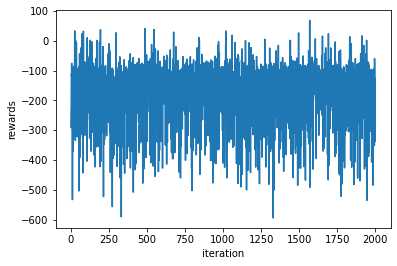

In [19]:
sns.lineplot(data=tmp, x= 'iteration', y='rewards')

In [12]:
import pandas as pd

In [13]:
pd.DataFrame({'rewards': rewards, 'discount' : DISCOUNT, 'learning rate' : LEARNING_RATE}).to_csv('rewards.csv')